In [27]:
words = open('../names.txt', 'r').read().splitlines()

words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [28]:
a = len(words)
a

32033

In [29]:
min(len(word) for word in words)

2

In [30]:
max(len(word) for word in words)

15

In [31]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['</E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [32]:
b.items()
sorted(b.items(), key=lambda kv: kv[1], reverse=True)

[(('n', '</E>'), 6763),
 (('a', '</E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '</E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '</E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '</E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '</E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 147

In [33]:
from calendar import c
import torch

N = torch.zeros((27,27), dtype = torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {ch: i+1  for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i, in stoi.items()}

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    stoi1 = stoi[ch1]
    stoi2 = stoi[ch2]
    N[stoi1, stoi2] += 1

itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

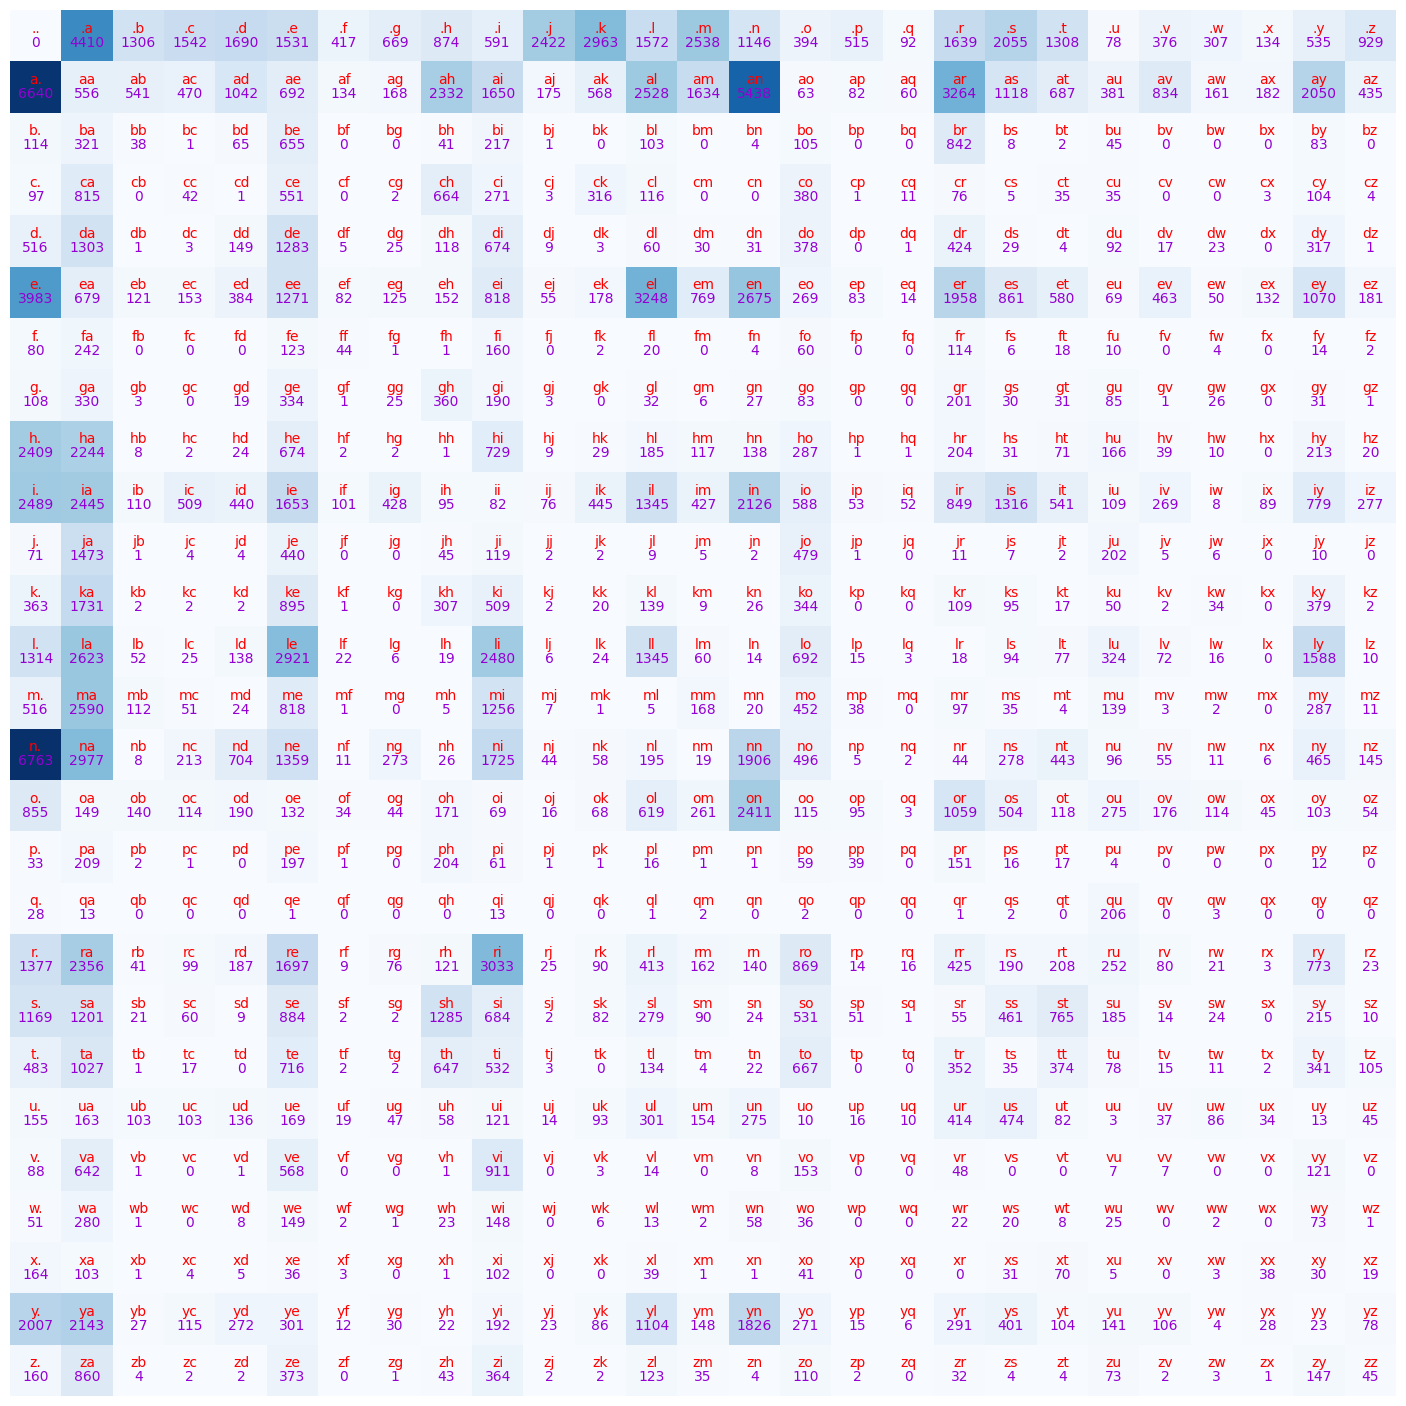

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,18))
plt.imshow(N, cmap='Blues')
for i in range(len(stoi)):
    for j in range(len(stoi)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='red')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='darkviolet')
plt.axis('off');



In [35]:
p = N[0].float()
p = p / p.sum()
p.sum()


tensor(1.)

In [36]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

itos[int(ix)]

'c'

In [37]:
g = torch.Generator().manual_seed(2147483647)
ix = 0

P = N.float()
P /= P.sum(dim=1, keepdim=True)


for i in range(20):
  out = []
  while True:
    p = N[ix].float()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix = int(ix)
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [38]:
pu =torch.ones(27) / 27
pu

tensor([0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370,
        0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370,
        0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370, 0.0370])

In [39]:
from doctest import testsource
from matplotlib.pylab import f

log_likelihood = 0
n = 0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    prob = P[stoi[ch1], stoi[ch2]].item()
    prob_tn= torch.tensor(prob)
    log_likelihood += torch.log(prob_tn)
    n += 1
    #print(f'P({ch1}|{ch2}) -> prob {prob:.4f}, log_likelihood:{log_likelihood:.4f}')
    
nll = -log_likelihood
anll = nll / n

print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{anll}')

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
2.454094171524048
